<a href="https://colab.research.google.com/github/salmaelgd/project_nlp/blob/main/trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyse de tendances

In [1]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Data exporting and giving a name to each column
file_path = '/content/drive/MyDrive/training.1600000.processed.noemoticon.csv'
df = pd.read_csv(file_path, encoding='latin-1', header=None)
df.columns = ['sentiment', 'ids', 'date', 'flag', 'user', 'tweet']

# Explore the dataset
print(df.head())
print(df.info())

   sentiment         ids                          date      flag  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                              tweet  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  -

In [4]:
colonnes_a_supprimer = ['flag', 'ids', 'user']
df.drop(colonnes_a_supprimer, axis=1, inplace=True)

print(df.head())

   sentiment                          date  \
0          0  Mon Apr 06 22:19:45 PDT 2009   
1          0  Mon Apr 06 22:19:49 PDT 2009   
2          0  Mon Apr 06 22:19:53 PDT 2009   
3          0  Mon Apr 06 22:19:57 PDT 2009   
4          0  Mon Apr 06 22:19:57 PDT 2009   

                                               tweet  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....  


In [5]:
# Text preprocessing
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = ' '.join([word for word in text.split() if (word.isalpha() and word not in stop_words)])
    return text

df['processed_tweet'] = df['tweet'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# Conversion de la colonne "date" en format datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extraction de l'année et du mois pour l'analyse temporelle
df['year_month'] = df['date'].dt.to_period('M')

# Grouper par mois et compter le nombre de tweets
monthly_tweet_counts = df.groupby('year_month').size()

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


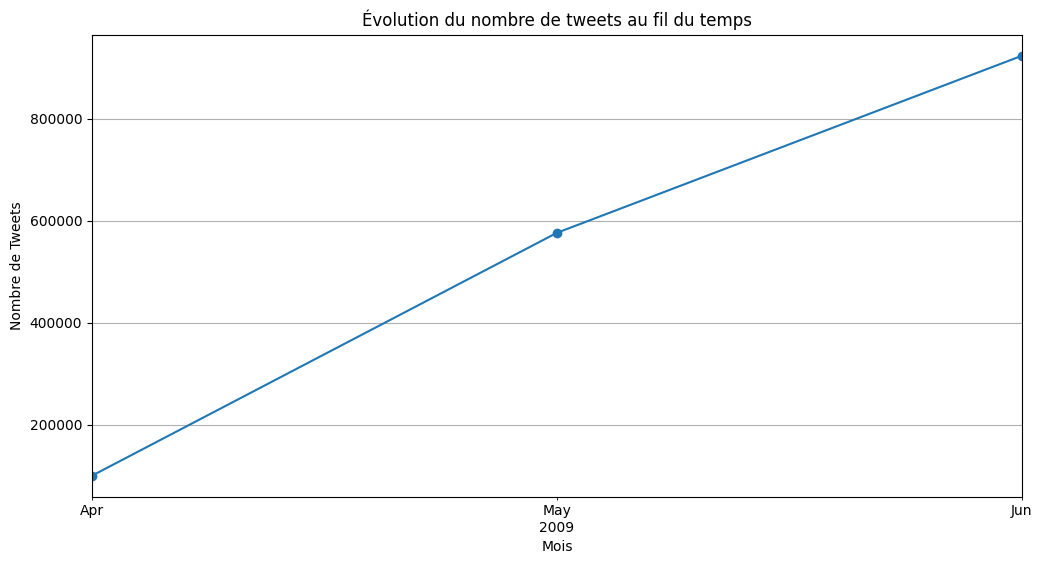

In [7]:
import matplotlib.pyplot as plt
# Tracer l'évolution du nombre de tweets au fil du temps
plt.figure(figsize=(12, 6))
monthly_tweet_counts.plot(marker='o', linestyle='-')
plt.title('Évolution du nombre de tweets au fil du temps')
plt.xlabel('Mois')
plt.ylabel('Nombre de Tweets')
plt.grid(True)
plt.show()

In [8]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_tweet'])

In [9]:
# Assuming three clusters for descriptive events, popular events, and daily routines
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
# Print cluster centers (terms that represent each cluster)
print("Cluster Centers:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i + 1}: ", end='')
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end='')
    print()

# Explore the clustered data
print("Cluster Distribution:")
print(df['cluster'].value_counts())

Cluster Centers:
Cluster 1: good get like going go day got back miss know 
Cluster 2: work go back day get going today tomorrow got time 
Cluster 3: love would much new see like good know miss song 
Cluster Distribution:
0    1499817
2      54309
1      45874
Name: cluster, dtype: int64


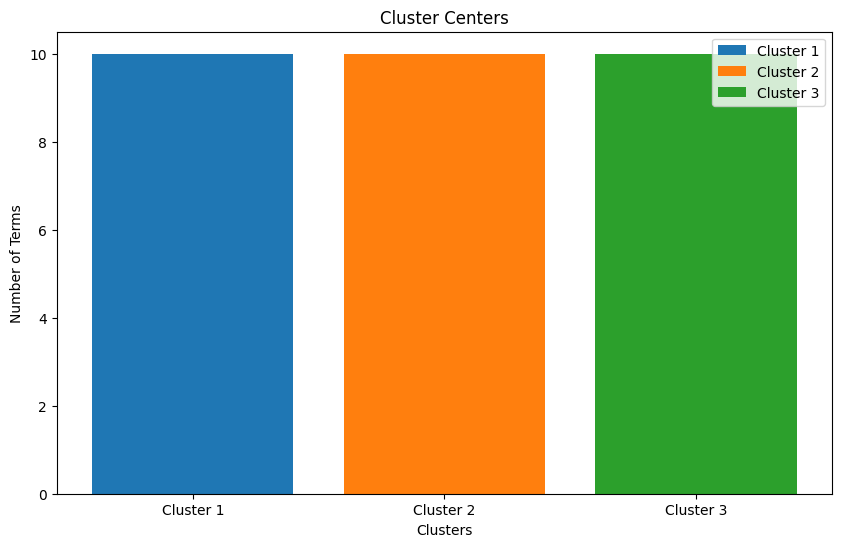

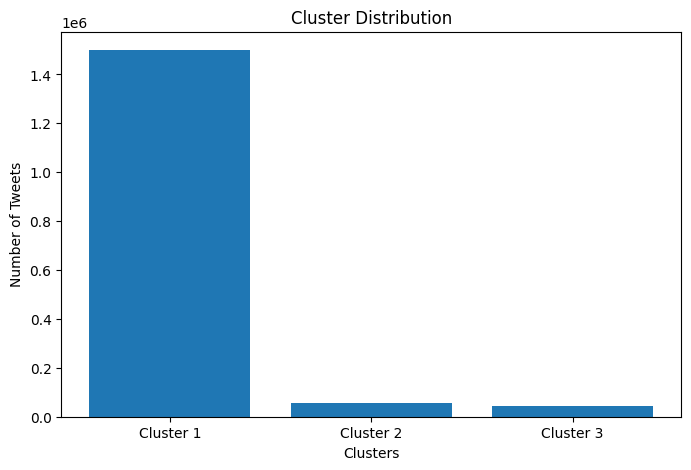

In [11]:
import matplotlib.pyplot as plt

# Cluster Centers
cluster_centers = {
    'Cluster 1': ['good', 'get', 'like', 'going', 'go', 'day', 'got', 'back', 'miss', 'know'],
    'Cluster 2': ['work', 'go', 'back', 'day', 'get', 'going', 'today', 'tomorrow', 'got', 'time'],
    'Cluster 3': ['love', 'would', 'much', 'new', 'see', 'like', 'good', 'know', 'miss', 'song']
}

# Cluster Distribution
cluster_distribution = {
    'Cluster 1': 1499817,
    'Cluster 2': 54309,
    'Cluster 3': 45874
}

# Plotting Cluster Centers
plt.figure(figsize=(10, 6))
for cluster, terms in cluster_centers.items():
    plt.bar(cluster, len(terms), label=cluster)

plt.xlabel('Clusters')
plt.ylabel('Number of Terms')
plt.title('Cluster Centers')
plt.legend()
plt.show()

# Plotting Cluster Distribution
plt.figure(figsize=(8, 5))
plt.bar(cluster_distribution.keys(), cluster_distribution.values())
plt.xlabel('Clusters')
plt.ylabel('Number of Tweets')
plt.title('Cluster Distribution')
plt.show()


In [12]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

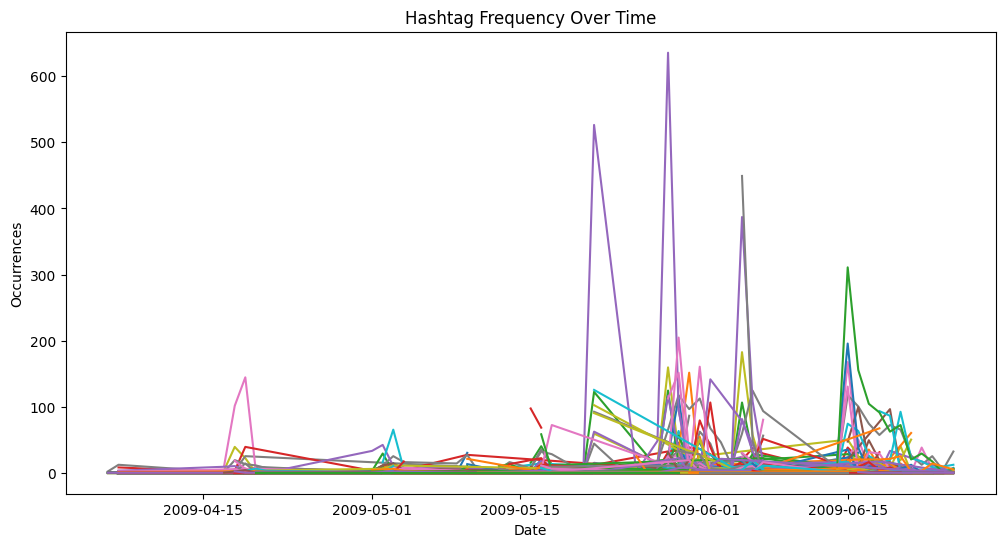

<Figure size 1000x500 with 0 Axes>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter

# Supposons que votre DataFrame 'df' a une colonne 'tweet' et 'date'
# Assurez-vous que la colonne 'date' est au format datetime

def extract_hashtags_from_column(text):
    hashtags = re.findall(r"#\w+", text)
    return hashtags

# Appliquer la fonction extract_hashtags_from_column à chaque ligne de la colonne 'tweet'
df['hashtags'] = df['tweet'].apply(extract_hashtags_from_column)

# Créer une nouvelle colonne 'day' pour extraire le jour de chaque date
df['day'] = df['date'].dt.date

# Compter le nombre d'occurrences de chaque hashtag pour chaque jour
daily_hashtags_counter = Counter()
for index, row in df.iterrows():
    for hashtag in row['hashtags']:
        daily_hashtags_counter[(row['day'], hashtag)] += 1

# Convertir le compteur en DataFrame
daily_hashtags_df = pd.DataFrame(list(daily_hashtags_counter.items()), columns=['day_hashtag', 'occurrences'])

# Séparer la colonne 'day_hashtag' en deux colonnes distinctes pour 'day' et 'hashtag'
daily_hashtags_df[['day', 'hashtag']] = pd.DataFrame(daily_hashtags_df['day_hashtag'].tolist(), index=daily_hashtags_df.index)

# Tracer un graphique de la fréquence des hashtags par rapport au temps
plt.figure(figsize=(12, 6))
for hashtag, data in daily_hashtags_df.groupby('hashtag'):
    plt.plot(data['day'], data['occurrences'], label=hashtag)
plt.xlabel('Date')
plt.ylabel('Occurrences')
plt.title('Hashtag Frequency Over Time')
plt.figure(figsize=(10, 5))
#plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
#plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()


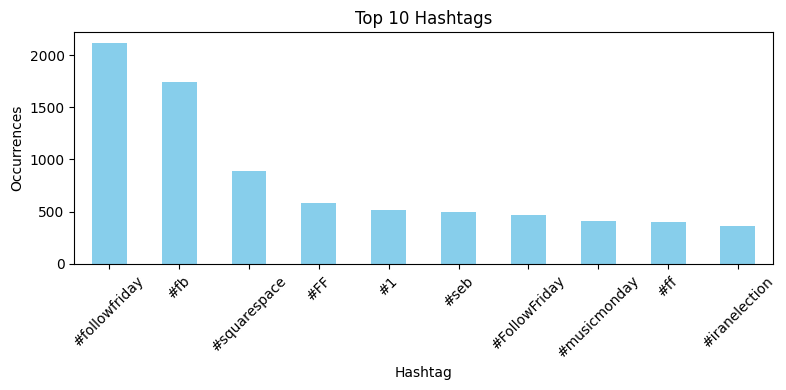

In [14]:
# Afficher les 10 hashtags les plus fréquents
top_hashtags = daily_hashtags_df.groupby('hashtag')['occurrences'].sum().sort_values(ascending=False).head(10)

# Tracer un graphique des 10 hashtags les plus fréquents
plt.figure(figsize=(8, 4))
top_hashtags.plot(kind='bar', color='skyblue')
plt.xlabel('Hashtag')
plt.ylabel('Occurrences')
plt.title('Top 10 Hashtags')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()